In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load dataset
data = pd.read_csv("C:/Users/PRIYANKA/Downloads/Salary_Data.csv")

# see first 5 rows
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
#shape
print("Shape:", data.shape)

#info
print(data.info())

#summary statistics
print(data.describe())

#check null values
print(data.isnull().sum())



Shape: (6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.

In [3]:
# Fill numeric columns with median
data['Years of Experience'] = data['Years of Experience'].fillna(data['Years of Experience'].median())
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

# Check again
print("Missing values after filling:\n")
print(data.isnull().sum())


Missing values after filling:

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


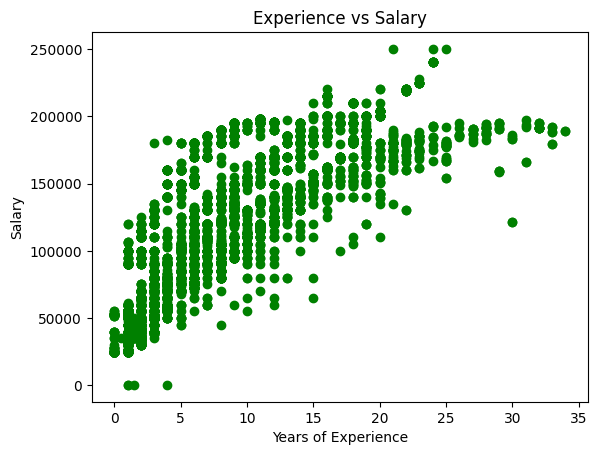

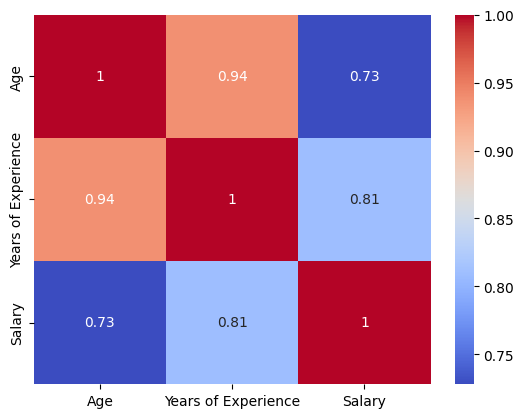

In [4]:
plt.scatter(data['Years of Experience'], data['Salary'], color = 'green')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()


#correlation heatmap
sns.heatmap(data[['Age', 'Years of Experience','Salary']].corr(),annot = True, cmap = "coolwarm")
plt.show()

In [5]:


X = data[['Years of Experience']]
y = data['Salary']

print(X.isnull().sum())
print(y.isnull().sum())



Years of Experience    0
dtype: int64
0


In [6]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (slope): 7059.805703729876
Intercept: 58368.20002524934


In [8]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:" , mse)
print("R² Score:", r2)

Mean Squared Error: 927151852.2288836
R² Score: 0.6528414087327558


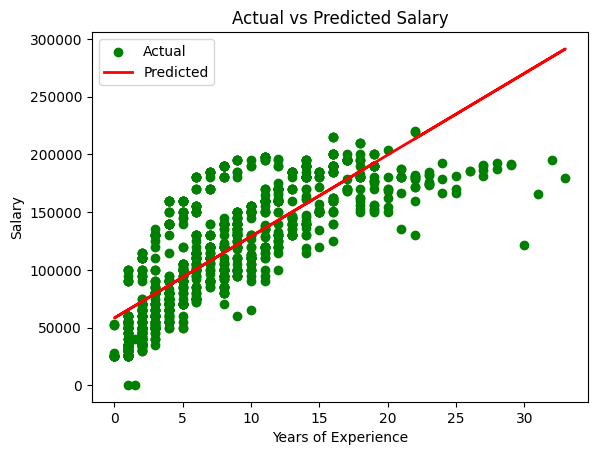

In [11]:
plt.scatter(X_test, y_test,color = 'green',label='Actual')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2, label = 'Predicted')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()

In [12]:
new_data = pd.DataFrame({'Years of Experience':[5,10,15]})
predicted_salary= model.predict(new_data)
print("Predicted salaries:", predicted_salary)

Predicted salaries: [ 93667.2285439  128966.25706255 164265.2855812 ]
